In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.externals import joblib

In [2]:
cut = 77 / 180 * np.pi
zenbins = 10
eMin = 400
eMax = 30000
ebins = 10

In [3]:
area_byR_nonstop = joblib.load('/home/sninfa/jupyter/data/400-30k_10Bins/effArea_mgs_nonstop.pickle')
area_byE_nonstop = joblib.load('/home/sninfa/jupyter/data/400-30k_10Bins/effArea_mgs_corsica_nonstop_total.pickle')

In [4]:
area_byR_nonstop

,predicted_count,total_count,effective_area_total
,MuonWeight,MuonWeight,
zen_bin,,,
"(0.187, 0.269]",0.096260,56.399544,20589.744842
"(0.269, 0.35]",0.096954,182.707927,6401.596798
"(0.35, 0.431]",0.075256,397.139059,2286.023263
"(0.431, 0.512]",0.051505,693.297282,896.210945
"(0.512, 0.594]",0.053745,1061.528116,610.778864
"(0.594, 0.675]",0.057065,1485.890202,463.301795
"(0.675, 0.756]",0.054908,1958.611326,338.197767
"(0.756, 0.837]",0.062565,2455.220558,307.413236


In [5]:
area_byE_nonstop

,effective_area_total
e_bin,
"(400.0, 615.979]",733.776521
"(615.979, 948.576]",496.257901
"(948.576, 1460.758]",632.305334
"(1460.758, 2249.492]",1528.581128
"(2249.492, 3464.102]",4418.760509
"(3464.102, 5334.537]",9260.521844
"(5334.537, 8214.911]",12844.476199
"(8214.911, 12650.538]",14279.719673
"(12650.538, 19481.174]",15257.198272


/cvmfs/icecube.opensciencegrid.org/py2-v3.0.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/sninfa/software/python_library/lib/python2.7/site-packages/pandas/core/series.py:935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_with(key, value)


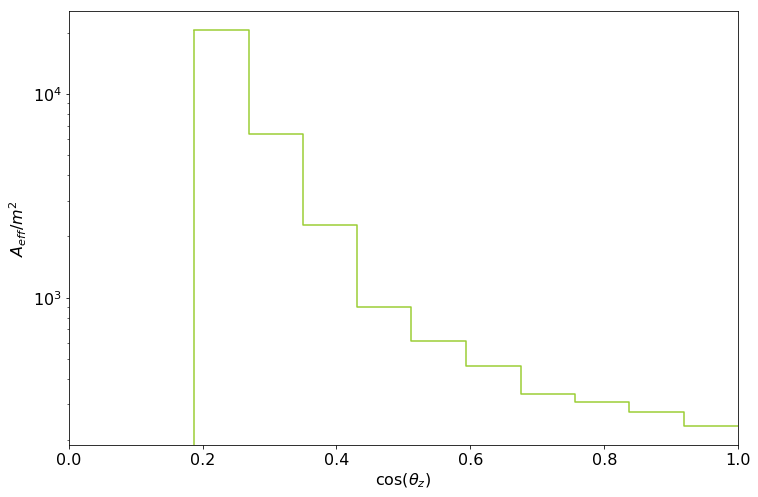

In [6]:
area_copy = area_byR_nonstop.copy()

area_copy['lim'] = area_copy.index.categories.left
area_copy = area_copy.append(area_copy[-1:])
area_copy.lim[-1:] = area_copy.index.categories[-1:].right
ax = area_copy.plot(logy=True, drawstyle="steps-post", x='lim', y='effective_area_total', figsize=(12, 8), legend=False, color='yellowgreen')
ax.vlines(x=area_copy.lim[0], ymin=0 , ymax=area_copy.effective_area_total[0], color='yellowgreen')

ax.set_xlabel(r'$\cos (\theta_z$)', fontsize=16)
ax.set_ylabel(r'$A_{eff} / m^2$', fontsize=16)
ax.set_xlim(0.0, 1)
ax.tick_params(labelsize=16)

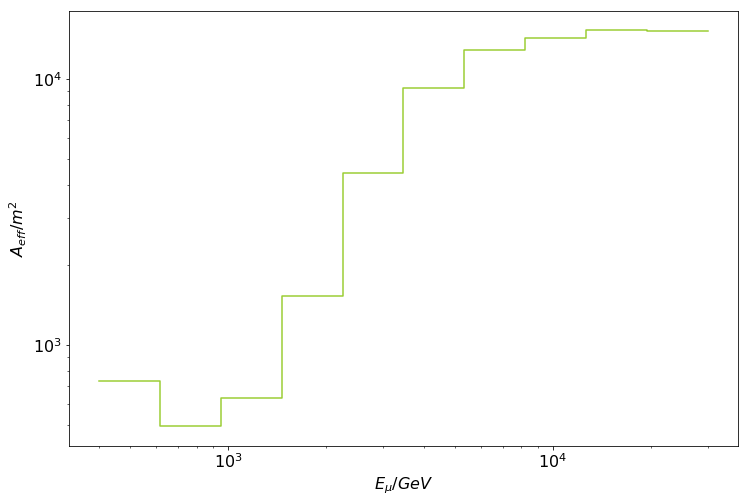

In [7]:
area_copy = area_byE_nonstop.copy()

area_copy['lim'] = area_copy.index.categories.left
area_copy = area_copy.append(area_copy[-1:])
area_copy.lim[-1:] = area_copy.index.categories[-1:].right
ax = area_copy.plot(loglog=True, drawstyle="steps-post", x='lim', y='effective_area_total', figsize=(12, 8), legend=False, color='yellowgreen')

ax.set_xlabel(r'$E_{\mu} / GeV$', fontsize=16)
ax.set_ylabel(r'$A_{eff} / m^2$', fontsize=16)
ax.tick_params(labelsize=16)

In [8]:
area_byR = joblib.load('/home/sninfa/jupyter/data/400-30k_10Bins/effArea_mgs.pickle')
area_byE = joblib.load('/home/sninfa/jupyter/data/400-30k_10Bins/effArea_mgs_corsica_total.pickle')
# data = joblib.load('/home/sninfa/jupyter/data/400-30k_10Bins/df_corsica.pickle')
data = joblib.load('/home/sninfa/jupyter/data/400-30k_10Bins/df_corsica_est.pickle')

In [9]:
data.head()

,index,energy_stop,quality,single_stopping,stop_z,weight,weight_G4,weight_H,zenith,zenith_cos
0,0,918.267617,-0.763199,0.011770,-346.347873,0.000002,0.000002,0.000001,0.584699,0.833878
1,1,0.000000,-0.863511,0.168681,259.431960,0.000001,0.000002,0.000001,1.424030,0.146240
2,2,1065.268388,-1.843313,0.000000,-133.683210,0.000002,0.000002,0.000002,0.954376,0.578118
3,3,1879.356881,-0.008548,0.666639,-318.553052,0.000002,0.000002,0.000002,2.480521,-0.789335
4,4,0.000000,-0.187154,0.164909,282.372149,0.000002,0.000002,0.000002,1.341320,0.227468


In [10]:
len(data.index)

2127602

In [11]:
len(data[(data.single_stopping > 0.79) & (data.quality < -0.6) & (data.zenith < cut)].index)

18164

In [12]:
area_byR

,predicted_count,total_count,true_count,effective_area,effective_area_total
,MuonWeight,MuonWeight,MuonWeight,,
zen_bin,,,,,
"(0.187, 0.269]",0.002448,56.399544,4.264560,6926.137482,523.708649
"(0.269, 0.35]",0.003636,182.707927,16.863372,2601.359787,240.097395
"(0.35, 0.431]",0.002890,397.139059,42.009317,829.836862,87.780034
"(0.431, 0.512]",0.002270,693.297282,81.629834,335.406186,39.491214
"(0.512, 0.594]",0.003833,1061.528116,137.562475,336.105104,43.555559
"(0.594, 0.675]",0.004473,1485.890202,209.249097,257.898283,36.318284
"(0.675, 0.756]",0.003929,1958.611326,297.935442,159.107219,24.202699
"(0.756, 0.837]",0.006720,2455.220558,402.530926,201.402405,33.019721


/cvmfs/icecube.opensciencegrid.org/py2-v3.0.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


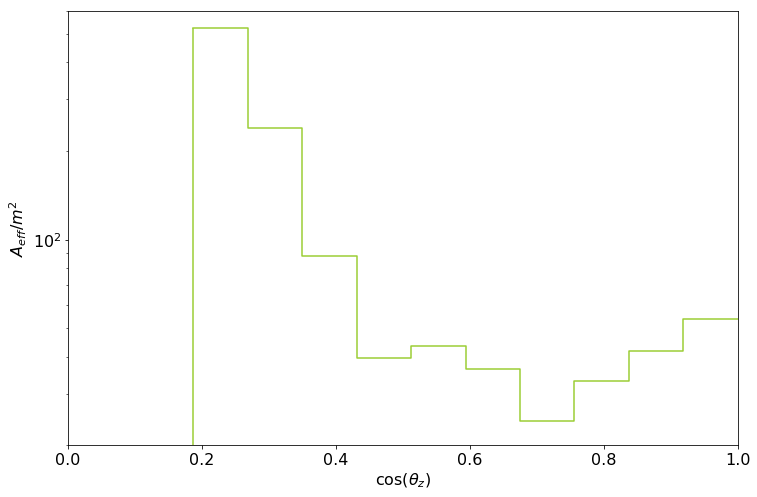

In [13]:
area_copy = area_byR.copy()

area_copy['lim'] = area_copy.index.categories.left
area_copy = area_copy.append(area_copy[-1:])
area_copy.lim[-1:] = area_copy.index.categories[-1:].right
ax = area_copy.plot(logy=True, drawstyle="steps-post", x='lim', y='effective_area_total', figsize=(12, 8), legend=False, color='yellowgreen')
ax.vlines(x=area_copy.lim[0], ymin=0 , ymax=area_copy.effective_area_total[0], color='yellowgreen')

ax.set_xlabel(r'$\cos (\theta_z$)', fontsize=16)
ax.set_ylabel(r'$A_{eff} / m^2$', fontsize=16)
ax.set_xlim(0.0, 1)
ax.set_ylim(20.0, 600)
ax.tick_params(labelsize=16)

In [14]:
#data = data[(data.single_stopping) & (data.zenith < cut)]
data = data[(data.single_stopping > 0.79) & (data.quality < -0.6) & (data.zenith < cut)]

zen_bins = np.linspace(np.cos(cut), 1, num=zenbins+1)

# area_byR.index = set(pd.cut(data.zenith_cos, zen_bins))

data['zen_bin'] = pd.cut(data.zenith_cos, zen_bins)
data['effective_area'] = area_byR.effective_area.loc[data.zen_bin].values

In [15]:
data.head()

,index,energy_stop,quality,single_stopping,stop_z,weight,weight_G4,weight_H,zenith,zenith_cos,zen_bin,effective_area
31,31,901.579416,-0.915937,0.918982,-37.809643,0.000003,0.000003,0.000003,0.302525,0.954587,"(0.919, 1.0]",278.072813
56,56,649.290432,-0.942562,0.993283,82.244806,0.000002,0.000002,0.000002,0.342461,0.941931,"(0.919, 1.0]",278.072813
110,110,2012.401581,-0.610688,0.843741,-49.841582,0.000003,0.000003,0.000002,1.046351,0.500733,"(0.431, 0.512]",335.406186
134,134,732.367213,-0.667617,0.994773,99.916354,0.000002,0.000002,0.000002,0.808617,0.690499,"(0.675, 0.756]",159.107219
213,213,774.536278,-0.637040,0.972697,-327.524507,0.000002,0.000002,0.000002,0.231131,0.973408,"(0.919, 1.0]",278.072813


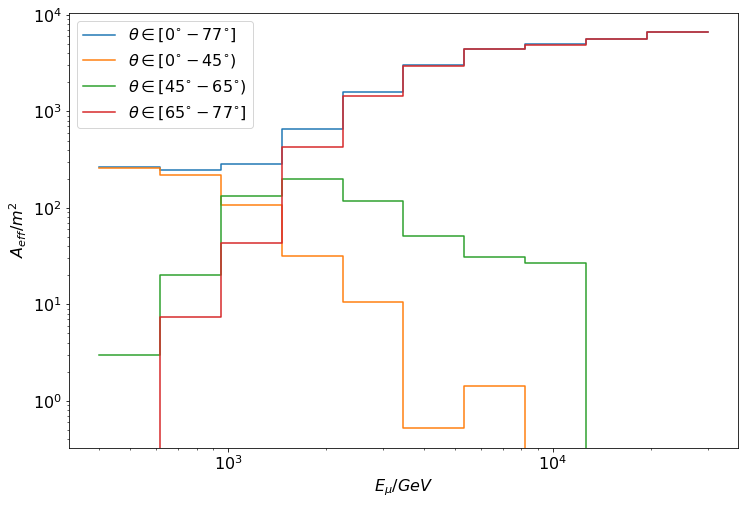

In [16]:
e_bins = np.logspace(np.log10(eMin), np.log10(eMax), num=ebins+1)
data['e_bin'] = pd.cut(data.energy_stop, e_bins)
data.dropna(inplace=True)
data_agg = data[['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.average(x,weights=data.loc[x.index, "weight"]))
data_agg.columns = ['total']
# data_agg['sec_1'] = data[data.zenith * 180 / np.pi < 50][['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.average(x,weights=data.loc[x.index, "weight"]))
# data_agg['sec_2'] = data[(data.zenith * 180 / np.pi >= 50) & (data.zenith * 180 / np.pi < 70)][['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.average(x,weights=data.loc[x.index, "weight"]))
# data_agg['sec_3'] = data[data.zenith * 180 / np.pi >= 70][['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.average(x,weights=data.loc[x.index, "weight"]))
data_agg['sec_1'] = data[data.zenith * 180 / np.pi < 45][['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(x * data.loc[x.index, "weight"])) / data[['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(data.loc[x.index, "weight"]))
data_agg['sec_2'] = data[(data.zenith * 180 / np.pi >= 45) & (data.zenith * 180 / np.pi < 65)][['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(x * data.loc[x.index, "weight"])) / data[['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(data.loc[x.index, "weight"]))
data_agg['sec_3'] = data[data.zenith * 180 / np.pi >= 65][['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(x * data.loc[x.index, "weight"])) / data[['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(data.loc[x.index, "weight"]))
data_agg.fillna(0.0, inplace=True)

data_agg['lim'] = data_agg.index.categories.left
data_agg = data_agg.append(data_agg[-1:])
data_agg.lim[-1:] = data_agg.index.categories[-1:].right

ax = data_agg.plot(loglog=True, drawstyle="steps-post", x='lim', y=['total', 'sec_1', 'sec_2', 'sec_3'],
              label=[r'$\theta \in [0 ^{\circ} - 77 ^{\circ}$]', r'$\theta \in [0 ^{\circ} - 45 ^{\circ})$', 
                     r'$\theta \in [45 ^{\circ} - 65 ^{\circ})$', r'$\theta \in [65 ^{\circ} - 77 ^{\circ}]$'], 
                   figsize=(12, 8))

ax.legend(loc='best', prop={'size': 16})
ax.set_xlabel(r'$E_{\mu} / GeV$', fontsize=16)
ax.set_ylabel(r'$A_{eff} / m^2$', fontsize=16)
ax.tick_params(labelsize=16)

In [17]:
data.effective_area = area_byR.effective_area_total.loc[data.zen_bin].values

In [18]:
data.head()

,index,energy_stop,quality,single_stopping,stop_z,weight,weight_G4,weight_H,zenith,zenith_cos,zen_bin,effective_area,e_bin
31,31,901.579416,-0.915937,0.918982,-37.809643,0.000003,0.000003,0.000003,0.302525,0.954587,"(0.919, 1.0]",53.921612,"(615.979, 948.576]"
56,56,649.290432,-0.942562,0.993283,82.244806,0.000002,0.000002,0.000002,0.342461,0.941931,"(0.919, 1.0]",53.921612,"(615.979, 948.576]"
110,110,2012.401581,-0.610688,0.843741,-49.841582,0.000003,0.000003,0.000002,1.046351,0.500733,"(0.431, 0.512]",39.491214,"(1460.758, 2249.492]"
134,134,732.367213,-0.667617,0.994773,99.916354,0.000002,0.000002,0.000002,0.808617,0.690499,"(0.675, 0.756]",24.202699,"(615.979, 948.576]"
213,213,774.536278,-0.637040,0.972697,-327.524507,0.000002,0.000002,0.000002,0.231131,0.973408,"(0.919, 1.0]",53.921612,"(615.979, 948.576]"


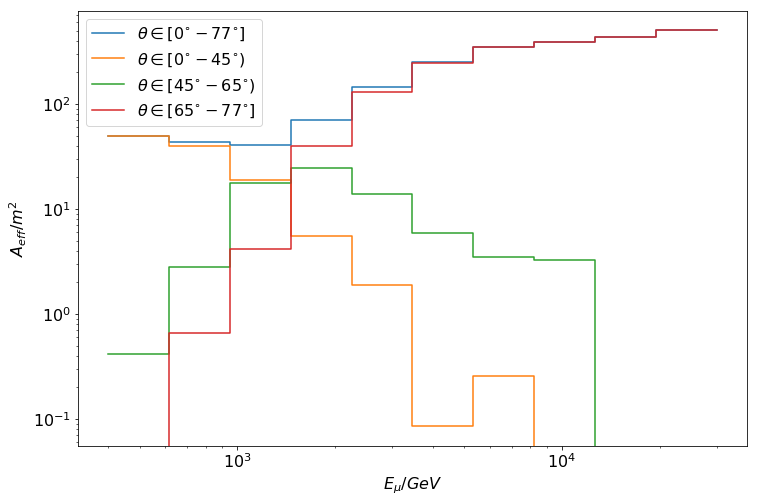

In [19]:
data_agg = data[['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.average(x,weights=data.loc[x.index, "weight"]))
data_agg.columns = ['total']
data_agg['sec_1'] = data[data.zenith * 180 / np.pi < 45][['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(x * data.loc[x.index, "weight"])) / data[['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(data.loc[x.index, "weight"]))
data_agg['sec_2'] = data[(data.zenith * 180 / np.pi >= 45) & (data.zenith * 180 / np.pi < 65)][['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(x * data.loc[x.index, "weight"])) / data[['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(data.loc[x.index, "weight"]))
data_agg['sec_3'] = data[data.zenith * 180 / np.pi >= 65][['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(x * data.loc[x.index, "weight"])) / data[['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(data.loc[x.index, "weight"]))
data_agg.fillna(0.0, inplace=True)

data_agg['lim'] = data_agg.index.categories.left
data_agg = data_agg.append(data_agg[-1:])
data_agg.lim[-1:] = data_agg.index.categories[-1:].right

ax = data_agg.plot(loglog=True, drawstyle="steps-post", x='lim', y=['total', 'sec_1', 'sec_2', 'sec_3'],
              label=[r'$\theta \in [0 ^{\circ} - 77 ^{\circ}$]', r'$\theta \in [0 ^{\circ} - 45 ^{\circ})$', 
                     r'$\theta \in [45 ^{\circ} - 65 ^{\circ})$', r'$\theta \in [65 ^{\circ} - 77 ^{\circ}]$'], 
                   figsize=(12, 8))

ax.legend(loc='best', prop={'size': 16})
ax.set_xlabel(r'$E_{\mu} / GeV$', fontsize=16)
ax.set_ylabel(r'$A_{eff} / m^2$', fontsize=16)
ax.tick_params(labelsize=16)

In [20]:
area_byE

,effective_area_total
e_bin,
"(400.0, 615.979]",50.256879
"(615.979, 948.576]",42.830950
"(948.576, 1460.758]",38.692079
"(1460.758, 2249.492]",46.101242
"(2249.492, 3464.102]",94.191642
"(3464.102, 5334.537]",203.337422
"(5334.537, 8214.911]",301.038782
"(8214.911, 12650.538]",345.085672
"(12650.538, 19481.174]",389.695362
